# Laboratorio 6: Ecuaciones diferenciales parciales elípticas

¡Bienvenidos al sexto laboratorio del curso *Fundamentos de Dinámica de Fluidos Computacional*! La clase pasada estudiamos la solución numérica de ecuaciones diferenciales parciales elípticas, que encontramos en muchos problemas relacionados con mecánica de fluidos. Una ecuación clásica que cae dentro de esta clasificación es la ecuación de Poisson:

\begin{equation}
\nabla² \phi = f,
\end{equation}

que para $f(\mathbf{x})=0$ se conoce como ecuación de Laplace. Para el caso unidimensional, la ecuación de Poisson termina siendo una ecuación diferencial ordinaria, pues depende de una sola variable, sin embargo, en dos y tres dimensiones es una ecuación diferencial parcial.

¿Dónde encontramos esta ecuación? En muchas partes. Algunos ejemplos son:
* *Flujo potencial*: el campo vectorial de velocidad es irrotacional y tiene divergencia cero, por lo que se puede representar como el gradiente de un potencial $(\Phi)$, donde $\nabla² \Phi=0$.
* *Flujo de Stokes*: cuando el número de Reynolds es muy bajo, la ecuación de Navier-Stokes es dominado por el término difusivo y se reduce a una ecuación de Poisson.
* *Electrostática*: el campo eléctrico es irrotacional (ya que no hay campo magnético en el caso estático), por lo que se puede representar con un potencial $(\mathbf{E}=\nabla\Phi)$, lo que combinado con la ley de Gauss da $\nabla² \Phi = \rho/\epsilon_0$, donde $\rho$ es la distribución de carga y $\epsilon_0$ la permitividad en el vacío, entrega una ecuación de Poisson.

## Discretización

Usemos la ecuación de Poisson en el dominio bidimensional $[0, L]\times[0,L]$ para guiar la discusión:

\begin{align}
\nabla² \phi &= \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = f, \\
\phi &= \phi_0 \text{ en } x=0 \\
\phi &= \phi_1 \text{ en } y=0 \\
\frac{\partial \phi}{\partial x} &= a \text{ en } x=L \\ 
\frac{\partial \phi}{\partial y} &= b \text{ en } y=L \\ 
\end{align}

Donde $\phi(x,y)$ y $f(x,y)$ son funciónes escalares que dependen de dos variables. 

Echémosle una mirada a la malla. Es un problema en dos dimensiones, entonces tenemos $N$ puntos de discretización en $x$ e $y$, los cuales tienen índices $i$ y $j$ que van de $0$ a $N-1$:

<img src="mesh.png" width="400px">

En este dibujo, los diamantes blancos son nodos en el borde (donde se enfuerzan condiciones de contorno), y los círculos negros están en el dominio (donde se cumple la ecuación de Poisson). La flecha indica el orden que vamos a seguor para resolver las ecuaciones (quedará más claro en la próxima sección.

Ya sabemos discretizar una segunda derivada ¿cierto? Usemos diferencias centradas

\begin{equation}
\frac{\phi_{i+1,j} -2\phi_{i,j} + \phi_{i-1,j}}{\Delta x^2} + \frac{\phi_{i,j+1} -2\phi_{i,j} + \phi_{i,j-1}}{\Delta y^2} = f_{i,j}
\end{equation}

y digamos que la malla es regular en ambos sentidos con $\Delta x=\Delta y = \Delta$:

\begin{equation}
\phi_{i+1,j} + \phi_{i,j+1} - 4\phi_{i,j} + \phi_{i-1,j} + \phi_{i,j-1} = f_{i,j} \cdot \Delta^2
\end{equation}

## Generación de la matriz

Este es un caso algo distinto a lo que hemos estado haciendo: la función no depende del tiempo, y no hay una variable clara sobre la cual iterar. Así como lo hicimos en el laboratorio 5 con el método de Euler implícito, evaluemos la ecuación discretizada en cada nodo. 

Tengamos en consideración que los nodos con índice $i=0$, $j=0$, $i=N-1$ y $j=N-1$ están en el borde, por lo que la ecuación de Poisson no es válida ahí, y solamente se enfuerza la condición de contorno. Por esto, nuestro primer nodo será $i=1, j=1$, y recorreremos la malla siguiendo la flecha de la figura.

$i=1, j=1$:

\begin{equation}
\phi_{2,1} + \phi_{1,2} - 4\phi_{1,1} + \phi_{0,1} + \phi_{1,0} = f_{1,1} \cdot \Delta^2
\end{equation}

$i=2, j=1$:

\begin{equation}
\phi_{3,1} + \phi_{2,2} - 4\phi_{2,1} + \phi_{1,1} + \phi_{2,0} = f_{2,1} \cdot \Delta^2
\end{equation}

$\vdots$

$i=N-2, j=1$:

\begin{equation}
\phi_{N-1,1} + \phi_{N-2,2} - 4\phi_{N-2,1} + \phi_{N-3,1} + \phi_{N-2,0} = f_{N-2,1} \cdot \Delta^2
\end{equation}

$i=1, j=2$:

\begin{equation}
\phi_{2,2} + \phi_{1,3} - 4\phi_{1,2} + \phi_{0,2} + \phi_{1,1} = f_{1,2} \cdot \Delta^2
\end{equation}

$\vdots$

$i=N-2, j=N-2$:

\begin{equation}
\phi_{N-1,N-2} + \phi_{N-2,N-1} - 4\phi_{N-2,N-2} + \phi_{N-3,N-2} + \phi_{N-2,N-3} = f_{N-2,N-2} \cdot \Delta^2
\end{equation}

¿Se fijan que encontramos $\phi_{1,1}$ en las ecuaciones en el nodo $(1,1)$, $(2,1)$ y $(1,2)$? Al igual que la ecuación de difusión con un método implícito, al evaluar en cada nodo al mismo tiempo, esto termina siendo un sistema lineal. 

### Condiciones de borde

Antes de escribir la matriz, revisemos que pasa con los bordes:

**Borde inferior:** Condición de borde de Dirichlet. La ecuación para los nodos con $j=1$ es:

\begin{equation}
\phi_{i+1,1} + \phi_{i,2} - 4\phi_{i,1} + \phi_{i-1,1} + \phi_{i,0} = f_{i,1} \cdot \Delta^2
\end{equation}

y reemplazando $\phi_{i,0} = \phi_1$, queda

\begin{equation}
\phi_{i+1,1} + \phi_{i,2} - 4\phi_{i,1} + \phi_{i-1,1} = f_{i,1} \cdot \Delta^2 - \phi_1
\end{equation}

**Borde izquierdo:** Condición de Dirichlet. En este caso, $\phi_{0,j} = \phi_0$, dejando la ecuación de los nodos $i=1$:

\begin{equation}
\phi_{2,j} + \phi_{1,j+1} - 4\phi_{1,j} + \phi_{1,j-1} = f_{1,j} \cdot \Delta^2 - \phi_0
\end{equation}

**Borde superior:** Condición de borde de Neumann. La ecuación para los nodos $j=N-2$ es 

\begin{equation}
\phi_{i+1,N-2} + \phi_{i,N-1} - 4\phi_{i,N-2} + \phi_{i-1,N-2} + \phi_{i,N-3} = f_{i,N-2} \cdot \Delta^2
\end{equation}

La forma discretizada más simple de $\partial \phi/\partial y = b$ es

\begin{equation}
\left. \frac{\partial \phi}{\partial y}\right|_{y=L} \approx \frac{\phi_{i,N-1}-\phi_{i,N-2}}{\Delta} = b.
\end{equation}

Por lo tanto, podemos aproximar $\phi_{i,N-1} = \phi_{i,N-2} + \Delta \cdot b$, y reescribir la ecuación en estos nodos como:

\begin{equation}
\phi_{i+1,N-2} - 3\phi_{i,N-2} + \phi_{i-1,N-2} + \phi_{i,N-3} = f_{i,N-2} \cdot \Delta^2 - \Delta \cdot b
\end{equation}

**Borde derecho:** Condición de Neumann. La ecuación para los nodos $i=N-2$ es 

\begin{equation}
\phi_{N-1,j} + \phi_{N-2,j+1} - 4\phi_{N-2,j} + \phi_{N-3,j} + \phi_{N-2,j-1} = f_{N-2,j} \cdot \Delta^2,
\end{equation}

y al igual que en el caso del borde superior, aproximaremos $\phi_{N-1,j} = \phi_{N-2,j} + \Delta \cdot a$, dejando

\begin{equation}
\phi_{N-2,j+1} - 3\phi_{N-2,j} + \phi_{N-3,j} + \phi_{N-2,j-1} = f_{N-2,j} \cdot \Delta^2 - \Delta \cdot a.
\end{equation}

¡Todavía no estamos listos! En las esquinas ocurren particularidades: tenemos condiciones de contorno en dos lados. Veamos qué ocurre ahí.

**Esquina inferior izquierda $(i=1,j=1)$:** Condición de borde de Dirichlet a la izquierda y abajo. Despejando a la derecha lo conocido, la ecuación queda: 

\begin{equation}
\phi_{2,1} + \phi_{1,2} - 4\phi_{1,1} = f_{1,1} \cdot \Delta^2 -  \phi_{1} - \phi_{0}.
\end{equation}

**Esquina superior izquierda $(i=1, j=N-2)$:** Condición de borde de Dirichlet a la izquierda y de Neumann arriba. Nuevamente usaremos la aproximación de la derivada para decir que $\phi_{1,N-1} = \phi_{1,N-2} + \Delta \cdot b$, y pasaremos todos lo que conocemos al lado derecho de la ecuación:

\begin{equation}
\phi_{2,N-2} - 3\phi_{1,N-2} + \phi_{1,N-3} = f_{i,N-2} \cdot \Delta^2 - \Delta \cdot b - \phi_{0}.
\end{equation}

**Esquina superior derecha $(i=N-2,j=N-2)$:** Condición de Neumann arriba y a la derecha. Necesitaremos hacer la aproximación de la derivada en ambas direcciones: $\phi_{N-2,N-1} = \phi_{N-2,N-2} + \Delta \cdot b$ y $\phi_{N-1,N-2} = \phi_{N-2,N-2} + \Delta \cdot a$, lo que nos deja con

\begin{equation}
 - 2\phi_{N-2,N-2} + \phi_{N-3,N-2} + \phi_{N-2,N-3} = f_{N-2,N-2} \cdot \Delta^2 - \Delta \cdot a - \Delta \cdot b.
\end{equation}

**Esquina inferior derecha $(i=N-2, j=1)$:** Condición de borde de Neumann a la derecha y Dirichlet abajo. Aproximando $\phi_{N-1,1} = \phi_{N-2,1} + \Delta \cdot a$, llegamos a

\begin{equation}
\phi_{N-2,2} - 3\phi_{N-2,1} + \phi_{N-3,1} = f_{N-2,1} \cdot \Delta^2 - \Delta \cdot a - \phi_{1}.
\end{equation}

Finalmente, hemos revisado cada uno de los casos posibles.

Al resolver todas las ecuaciones al mismo tiempo, llegamos a un sistema lineal $N-2\times N-2$ del tipo

\begin{equation}
\left[ A \right] \left[\phi\right] = \left[ f \right] + \left[ c.b.\right]. 
\end{equation}

En más detalle, el sistema es:

\begin{align}
 &\begin{array}{c c c c c c c c c c c c c c c c}
|\leftarrow & & & N-2 & & \rightarrow| & &  & & & & & & & &
\end{array}\\
\begin{array}{c}
\overline{\uparrow} \\
\\
N-2 \\
\\
\\
\underline{\downarrow} \\
\uparrow\\
\\
N-2\\
\underline{\downarrow}\\
\\
\\
\\
\overline{\uparrow}\\
\\
N-2\\
\\
\underline{\downarrow}\\
\end{array}
&\left[
\begin{array}{c c c c c c c c c c c c c c c c c c}
4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & & & & & & & 0 \\
-1 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & & & & & & 0 \\
0 & -1 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & & & & & 0 \\
\vdots & & & & & & & & & & & & & & & & & \\
0 & \cdots & 0 & -1 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & & & 0 \\
0 & \cdots  & & 0 & -1 & 3 & 0 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & & 0 \\
-1 & 0 & \cdots & & 0 & 0 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & 0 \\
0 & -1 & 0 & \cdots & & 0 & -1 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & 0 \\
\vdots & & & & & & & & & & & & & & & & \\
0 & \cdots & 0 & -1 & 0 & \cdots & 0 & -1 & 3 & 0 & & \cdots & 0 & -1 & 0 & \cdots & & 0 \\
0 & \cdots & & 0 & -1 & 0 & \cdots & & 0 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & 0 \\
\vdots & & & & & & & & & & & & & & & & & \\
0 & \cdots & & & 0 & -1 & 0 & \cdots & 0 & -1 & 3 & 0 & \cdots & 0 & -1 & 0 & \cdots & 0 \\
0 & \cdots & & & & 0 & -1 & 0 & \cdots & 0 & 0 & 3 & -1 & 0 & \cdots & & & 0 \\
0 & \cdots & & & & & 0 & -1 & 0 & \cdots & 0 & -1 & 3 & -1 & 0 & \cdots & & 0 \\
\vdots & & & & & & & & & & & & & & & & & \\
0 & \cdots & & & & & & & & & 0 & -1 & 0 & \cdots & 0 & -1 & 3 & -1 \\
0 & \cdots & & & & & & & & & & 0 & -1 & 0 & \cdots & 0 & -1 & 2 \\
\end{array}
\right] \\
\cdot
&\left[
\begin{array}{c}
\phi_{1,1} \\
\phi_{2,1}\\
\phi_{3,1} \\
\vdots\\
\phi_{N-3,1}\\
\phi_{N-2,1}\\
\phi_{1,2}\\
\phi_{2,2}\\
\vdots\\
\phi_{N-2,2}\\
\phi_{1,3}\\
\vdots\\
\phi_{N-2,N-3}\\
\phi_{1,N-2}\\
\phi_{2,N-2}\\
\vdots\\
\phi_{N-3,N-2}\\
\phi_{N-2,N-2}\\
\end{array}
\right]
=
-\Delta^2 \cdot
\left[
\begin{array}{c}
f_{1,1} \\
f_{2,1}\\
f_{3,1} \\
\vdots\\
f_{N-3,1}\\
f_{N-2,1}\\
f_{1,2}\\
f_{2,2}\\
\vdots\\
f_{N-2,2}\\
f_{1,3}\\
\vdots\\
f_{N-2,N-3}\\
f_{1,N-2}\\
f_{2,N-2}\\
\vdots\\
f_{N-3,N-2}\\
f_{N-2,N-2}\\
\end{array}
\right]
+
\left[
\begin{array}{c}
\phi_0 + \phi_1 \\
\phi_1\\
\phi_1 \\
\vdots\\
\phi_1\\
\phi_1 + \Delta \cdot a\\
\phi_0\\
0\\
\vdots\\
\Delta \cdot a\\
\phi_0\\
\vdots\\
\Delta \cdot a\\
\phi_0 + \Delta \cdot b\\
\Delta \cdot b\\
\vdots\\
\Delta \cdot b\\
\Delta \cdot b + \Delta \cdot a\\
\end{array}
\right]
\end{align} 

Antes de seguir adelante, asegúrense de entender porqué está cada término en esta matriz. Fíjense que en la matriz los signos están invertidos con respecto a la derivación anterior. 

## Ejemplo

Resolvamos numéricamente la siguiente ecuación:

\begin{equation}
\nabla^2 \phi = -2\pi² \sin(\pi x) \cos(\pi y)
\end{equation}

en el dominio $[0,1]\times[-0.5,0.5]$, con condiciones de borde:

\begin{align}
\phi&=0 \text{ en } x=0 \text{ y } y=-0.5 \\
\frac{\partial \phi}{\partial x} &= -\pi \cos(\pi y) \text{ en } x=1 \\
\frac{\partial \phi}{\partial y} &= -\pi \sin(\pi x) \text{ en } y=0.5.
\end{align}

Afortunadamente, este problema tiene solución analítica para poder comparar nuestra solución numérica. La solución es:

\begin{equation}
\phi_\text{an} = \sin{\pi x}\cos{\pi y}
\end{equation}

Discretizaremos el dominio en 41 nodos en cada dirección.

Empecemos por importar las librerías necesarias y inicializar las variables. Generaremos la malla con la función `meshgrid` de `numpy`.

In [1]:
import numpy
from math import pi

xmin = 0.
xmax = 1.
ymin = -0.5
ymax = 0.5

N = 41

delta = (xmax-xmin)/(N-1)

x = numpy.linspace(xmin, xmax, N)
y = numpy.linspace(ymin, ymax, N)
X,Y = numpy.meshgrid(x,y)

F = -2*pi**2 * numpy.sin(pi*X) * numpy.cos(pi*Y)

### Ahora les toca a ustedes

Usando una malla con 41 nodos, generen la matriz y el vector del lado derecho, y resuelvan el sistema lineal correspondiente ¿Cuánto es el la norma L2 del error (vean el laboratorio 2 para la norma L2)?

*Recomendación 1:* la solución del sistema lineal sera un vector unidimensional con los valores de $\phi$ en los nodos del dominio (cículos negros en el dibujo), de tamaño $(N-2)\cdot(N-2)$. Para reordenar el vector unidimensional a uno bidimensional les daremos una función a continuación (`map_1Dto2D`). Existen opciones más eficientes, como usando [`numpy.reshape`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) ¡Inténtelo si tienen tiempo!

*Recomendación 2:* para visualizar el resultado, pueden usar la función [`matplotlib.pyplot.scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter). El comando sería más o menos así:

```Python
from matplotlib import pyplot
%matplotlib inline

pyplot.scatter(X, Y, c=phi)
```

Una vez que lograron resolver el problema para 41 nodos, repitan los cálculos para `N=21, 41, 81, 161`, y hagan un gráfico *log-log* de la norma L2 del error versus $\Delta$. Analicen ese gráfico ¿Cómo cae el error con el espaciamiento de malla? ¿Es la convergencia que esperan? ¿Por qué?


In [2]:
def map_1Dto2D(N, delta, X, Y, phi_1D):

    phi = numpy.zeros((N,N))
    
    row_number = 0
    for j in range(1,N-1):
        for i in range(1,N-1):
            phi[i,j] = phi_1D[row_number]
            row_number += 1
            
    # Dirichlet BC
    phi[0,:] = 0
    phi[:,0] = 0
    #Neumann BC
    phi[N-1,:] = -delta*pi*numpy.sin(pi*X[N-1,:]) + phi[N-2,:]
    phi[:,N-1] = -delta*pi*2*numpy.cos(pi*Y[:,N-1]) + phi[:,N-2]
    
    return phi  

In [3]:
### ALUMNO
import numpy as np
import scipy.linalg as sp

# Acuerdense de importar 'solve' de scipy.linalg para resolver el sistema lineal!
 
def L2_error(f_ap,f_an):
    df_an_app = (f_ap-f_an)**2
    f_an2 = f_an**2
    return np.sqrt(np.sum(df_an_app)/np.sum(f_an2))

def phi_analytic(X, Y):
    return numpy.sin(pi*X) * numpy.cos(pi*Y)

def generateMatrix(N):
        
    Nm = N-2
    N2 = (N-2)**2
    A = np.zeros((N2,N2))
    
    for k in range(Nm):
        for i in range(Nm):
                
            ii = i +k*Nm

            if k==Nm-1:
                A[ii,ii] = 3
            else:
                A[ii,ii] = 4

            if ii + Nm < N2:
                A[ii,ii+Nm] = -1
            
            if ii - Nm >= 0:
                A[ii,ii-Nm] = -1

            if i != 0:
                A[ii,ii-1] = -1
            if i != Nm-1:
                A[ii,ii+1] = -1

            if i == Nm-1:
                A[ii,ii] = 3
            
    A[ii,ii] = 2
    
    return A
    
def generateRHS(N, F, X, Y, phi_0, phi_1, delta):

    b = np.zeros((N-2)**2)
    counter = 0
    for j in range(1,N-1):
        for i in range(1,N-1):
            aa = -np.cos(np.pi*y[j])*np.pi
            bb = -np.sin(np.pi*x[i])*np.pi
            if j == 1:
                b[counter] = - delta**2 * F[i,j] + phi_1
                if i==1: 
                    b[counter] = - delta**2 * F[i,j] + phi_1 + phi_0
                if i == N-2:
                    b[counter] = - delta**2 * F[i,j] + phi_1 + delta*aa
                    
            if j == N-2:
                b[counter] = - delta**2 * F[i,j] + delta*bb
                if i==1: 
                    b[counter] = - delta**2 * F[i,j] + phi_0 + delta*bb
                if i == N-2:
                    b[counter] = - delta**2 * F[i,j] + delta*(aa+bb)
                    
            else:
                b[counter] = - delta**2 * F[i,j] 
                if i==1: 
                    b[counter] = - delta**2 * F[i,j] + phi_0
                if i == N-2:
                    b[counter] = - delta**2 * F[i,j] + delta*aa
            counter += 1
            
    A = generateMatrix(N)
    phi = sp.solve(A,b)
    
    phi = map_1Dto2D(N, delta, X, Y, phi)
    return phi
    

phi_0 = 0
phi_1 = 0



In [7]:
N = 41

delta = (xmax-xmin)/(N-1)
x = numpy.linspace(xmin, xmax, N)
y = numpy.linspace(ymin, ymax, N)
X,Y = numpy.meshgrid(x,y)
F = -2*pi**2 * numpy.sin(pi*X) * numpy.cos(pi*Y)

phi_sol = generateRHS(N, F, X, Y, phi_0, phi_1, delta)
error = L2_error(phi_sol,phi_analytic(X,Y))

print(f'La norma del error para N={N} nodos es: {error}')

La norma del error para N=41 nodos es: 0.01784851021123689


De esa forma se calcula el error para la malla con N=41 nodos, ahora se calcularán los errores variando la malla y se graficarán

In [9]:
### ALUMNO
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
#Estudie la convergencia del método viendo como cae el error con la malla
###

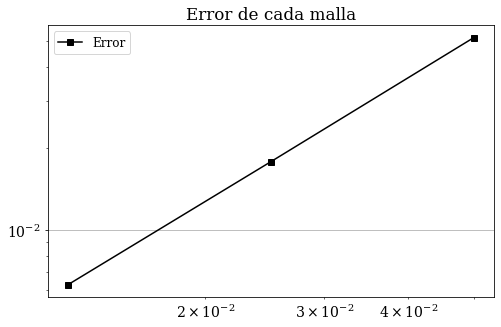

In [11]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,5)

L_nodos = np.array([21,41,81])
delta_dx = (xmax-xmin)/(L_nodos-1)
error = numpy.zeros(len(L_nodos))
for k in range(len(L_nodos)):
    
    N = L_nodos[k]
    delta = (xmax-xmin)/(N-1)
    x = numpy.linspace(xmin, xmax, N)
    y = numpy.linspace(ymin, ymax, N)
    X,Y = numpy.meshgrid(x,y)
    F = -2*pi**2 * numpy.sin(pi*X) * numpy.cos(pi*Y)
    
    phi_sol = generateRHS(N, F, X, Y, phi_0, phi_1, delta)
    error[k] = L2_error(phi_sol,phi_analytic(X,Y))

plt.loglog(delta_dx,error,label="Error",c='k', ls='-', marker='s')
plt.title("Error de cada malla")
plt.legend(loc='best',prop={'size':12})
plt.grid()



Viendo la grafica del error, se nota que al aumentar la cantidad de nodos, equivale a disminuir el $\Delta$, el error disminuye.

Cuesta ver un poco dado que el eje vertical solo tiene un valor, pero, el comportamiento que refleja el error es lineal. La aproximación del laplaciano se discretizó con métodos de segundo orden, pero las condiciones de Neumann se discretizaron con métodos de orden 1. Es por esto que todo el método queda con orden 1, de ahí el comportamiento lineal del error con la malla.

Por otra parte, dado que la matriz del sistema contiene muchos ceros, hubiera sido mucho mas eficiente tratarla como una matriz rala en scipy. Como esto no se hizo, python no deja crear la matriz para 181 nodos. De todas formas, voy a probar las funciones de scipy para hacer el código mas eficiente.

Se graficarán la superficie analítica y la numérica. A simple vista se notas bastante similares

Text(0.5, 0.92, 'Superficie Numérica')

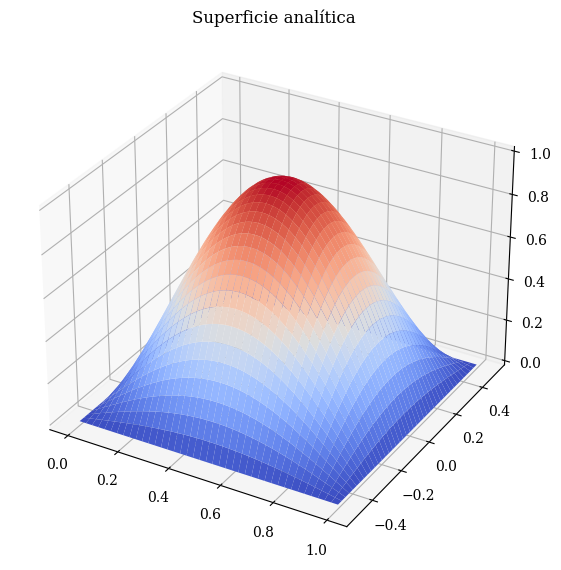

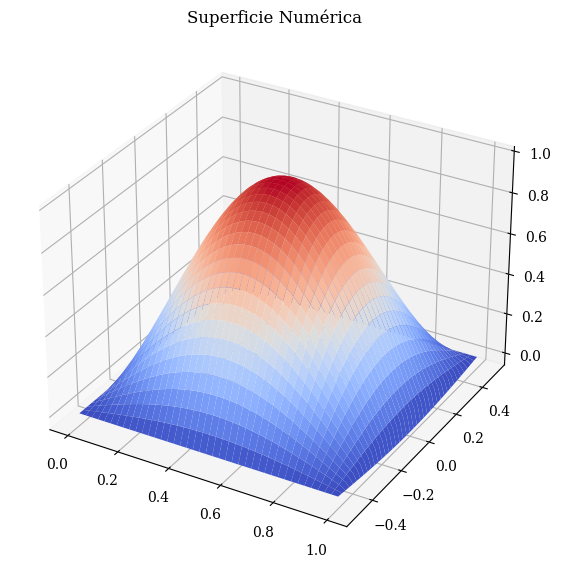

In [21]:
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,phi_analytic(X,Y), cmap='coolwarm');
ax.set_title("Superficie analítica")

fig2 = plt.figure(figsize=(11,7), dpi=100)
ax2 = fig2.gca(projection='3d')
ax2.plot_surface(X,Y,phi_sol, cmap='coolwarm');
ax2.set_title("Superficie Numérica")

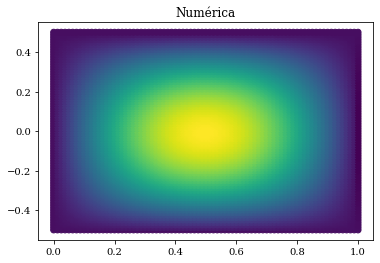

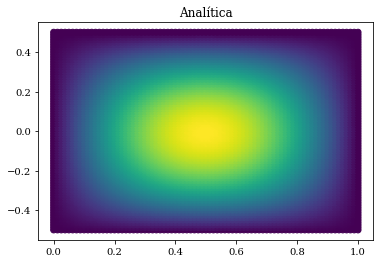

In [19]:
from matplotlib import pyplot
%matplotlib inline

plt.scatter(X, Y, c=phi_sol)
plt.title("Numérica")
plt.show()
plt.scatter(X,Y,c=phi_analytic(X,Y))
plt.title("Analítica")
plt.show()

Se nota que los resultados coinciden bastantes dado lo parecido de los gráficos y el error bajo obtenido